# **Dataset used for this portfolio task is: CIFAR-10 - Object Recognition in Images**

The data originates from here: https://www.kaggle.com/code/roblexnana/cifar10-with-cnn-for-beginer/data

Enabling and testing the GPU
First, we'll need to enable GPUs for the notebook:

* Navigate to Edit→Notebook Settings
* select GPU from the Hardware Accelerator drop-down
Next, we'll confirm that we can connect to the GPU with tensorflow:

In [1]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


# **About Dataset**

# **Context**

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

# **Introduction**

The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class.


# **Why CIFER 10 dataset**

 choose CIFAR 10 dataset to experiment my deep learning project for the below reasons
1.	CIFAR 10 is a bit challenging since it has 60K images, which is a lot for a begginer.
2.	The images are compressed so that they can be trained with less computational power.
3.	CIFAR 10 is very popular so that if I was struck at some point I can easily get lot of help from community.
4.	I dont need to deal with the hasle of downloading and handeling the data by writing python code. The data is readily available in keras datasets so that I can focus on the deep learning algorithm rather than the data cleaning.


# **Aim**

* The challenge is to recognize previously unseen images and assign them to one of the 10 classes.

**Import and Preprocess the data**





In [2]:
#Importing necessary library
import os
import numpy as np# linear algebra
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from __future__ import print_function
from sklearn.metrics import confusion_matrix, classification_report
import itertools

%matplotlib inline

* The code below loads the CIFAR-10 dataset using the Keras API and creates a plot of the first nine images in the training dataset.

170508288/170498071 [==============================] - 3s 0us/step


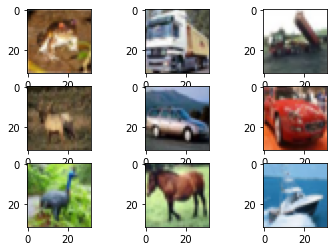

In [3]:
from keras.datasets import cifar10
from matplotlib import pyplot
(trainX, trainy), (testX, testy) = cifar10.load_data()
# plot first few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# plot raw pixel data
	pyplot.imshow(trainX[i])
# show the figure
pyplot.show()

* A plot of the first nine images in the dataset is also created. It is clear that the images are indeed very small compared to modern photographs; it can be challenging to see what exactly is represented in some of the images given the extremely low resolution.

This low resolution is likely the cause of the limited performance that top-of-the-line algorithms are able to achieve on the dataset.

Using Tensorflow

* Let's establish the hyperparameters and other global parameters for the model.

In [4]:
# The default batch size of keras.
batch_size = 32 
# Number of class for the dataset 
num_classes = 10  
epochs = 50
data_augmentation = False


**Importing and preprocessing the data**

We will load the data and split it between train and test sets

In [5]:
# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')



x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
50000 train samples
10000 test samples


In [6]:
#Counting the number of train and test 
n_train = y_train.shape[0]
n_test = y_test.shape[0]

print ("Number of training examples: {}".format(n_train))
print ("Number of testing examples: {}".format(n_test))




Number of training examples: 50000
Number of testing examples: 10000


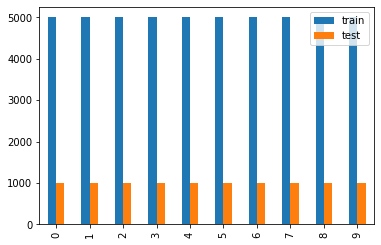

In [7]:
#plotting the bar test train count 
import pandas as pd

_, train_counts = np.unique(y_train, return_counts=True)
_, test_counts = np.unique(y_test, return_counts=True)
pd.DataFrame({'train': train_counts,
                    'test': test_counts}
            ).plot.bar()
plt.show()

**Distribution of data**


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


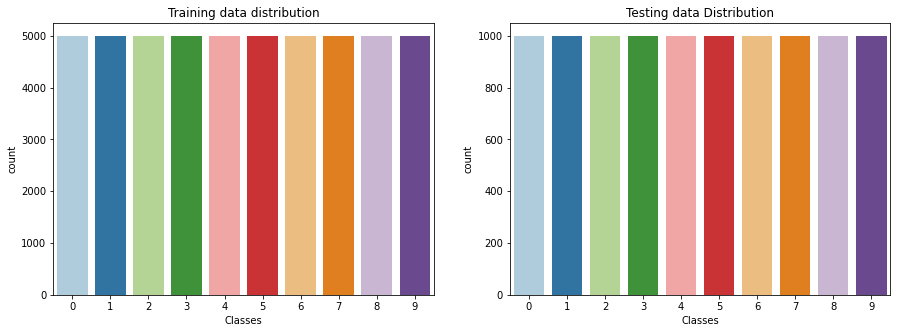

In [8]:
fig, axs = plt.subplots(1,2,figsize=(15,5)) 
# Set the color palette
sns.set_palette(sns.color_palette("Paired"))
# Count plot for training set
sns.countplot(y_train.ravel(), ax=axs[0])
axs[0].set_title('Training data distribution')
axs[0].set_xlabel('Classes')
# Count plot for testing set
sns.countplot(y_test.ravel(), ax=axs[1])
axs[1].set_title('Testing data Distribution')
axs[1].set_xlabel('Classes')
plt.show()

* As we can see, each class has exactly 6000 samples ( 5000 for training and 1000 for test).The graph above is highly crucial for training; for example, if we only had 1000 examples of label 1, the model will have difficulty detecting label 1"less accuracy," which is not likely to happen because everything appears to be OK. Because the quality of our model is dependent on knowing the dataset distribution behind distinct classes, it's critical to know.

**Data preprocessing**

There are 10 classes and that classes are represented as unique integers. This is a classification issue with many classes. 

We can, therefore, use a one hot encoding for the class element of each sample, transforming the integer into a 10 element binary vector with a 1 for the index of the class value. We can achieve this with the to_categorical() utility function.

In [9]:
from keras import utils as np_utils
# Normalize the data. Before we need to connvert data type to float for computation.
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# Convert class vectors to binary class matrices. This is called one hot encoding.
y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)

y_test = keras.utils.np_utils.to_categorical(y_test, num_classes)

* Now, Create the CNN model to predict the class labels.This is the basic CNN model.

**Defining the Model architecture Using ConVnets**

* The neural network will learn 32 convolutional filters, each measuring 3 x 3. The output dimension is the same as the input shape, so it will be 32 × 32 with relu activation, which is a simple approach to introduce non-linearity; then there are additional 32 convolutional filters, each with a 3 x 3 size with relu activation. Then there's a max-pooling operation with a 2 × 2 pool size and a 25% dropout.
* In the following step of the deep pipeline, our net will learn 64 convolutional filters, each with a 3 x 3 size. The output dimension is the same as the input shape, with relu activation; this is followed by additional 64 convolutional filters, each with a 3 x 3 size and relu activation. Following that, we have a max-pooling operation with a pool size of 2 × 2 and a 25% dropout.
* A dense network with 512 units with relu activation, followed by a 50% dropout and a softmax layer with 10 classes as output, one for each category, completes the deep pipeline.

In [10]:
#define the convnet
model = Sequential()
# CONV => RELU => CONV => RELU => POOL => DROPOUT
model.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# CONV => RELU => CONV => RELU => POOL => DROPOUT
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# FLATTERN => DENSE => RELU => DROPOUT
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
# a softmax classifier
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                        

Now, let us train the model.

**Model training**

Before preparing the network for training, the following items must be included:

* A loss function: to assess the network's performance.
* An optimizer: to update the network as additional data comes in, lowering the loss value.
* Metrics: to monitor network performance


In [11]:
#importing tenserflow from keras
from tensorflow import keras
from keras import optimizers
# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])


In [12]:
history = None  # For recording the history of trainning process.
if not data_augmentation:
    print('Not using data augmentation.')
    history = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
    history = model.fit_generator(datagen.flow(x_train, y_train,
                                    batch_size=batch_size),
                                    epochs=epochs,
                                    validation_data=(x_test, y_test),
                                    workers=4)

Not using data augmentation.
Epoch 1/50
1563/1563 [==============================] - 46s 20ms/step - loss: 1.8663 - accuracy: 0.3174 - val_loss: 1.5774 - val_accuracy: 0.4299
Epoch 2/50
1563/1563 [==============================] - 30s 19ms/step - loss: 1.5289 - accuracy: 0.4461 - val_loss: 1.3791 - val_accuracy: 0.5081
Epoch 3/50
1563/1563 [==============================] - 31s 20ms/step - loss: 1.3814 - accuracy: 0.5043 - val_loss: 1.2830 - val_accuracy: 0.5504
Epoch 4/50
1563/1563 [==============================] - 29s 19ms/step - loss: 1.2813 - accuracy: 0.5466 - val_loss: 1.1672 - val_accuracy: 0.5890
Epoch 5/50
1563/1563 [==============================] - 31s 20ms/step - loss: 1.1973 - accuracy: 0.5778 - val_loss: 1.1328 - val_accuracy: 0.6055
Epoch 6/50
1563/1563 [==============================] - 28s 18ms/step - loss: 1.1284 - accuracy: 0.6034 - val_loss: 1.0417 - val_accuracy: 0.6347
Epoch 7/50
1563/1563 [==============================] - 28s 18ms/step - loss: 1.0670 - accuracy

* Plotting diagnostic learning curves

**Training and validation curves**

Visualizing of history of fitting. This allow us to quickly know how our model fits our data.

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


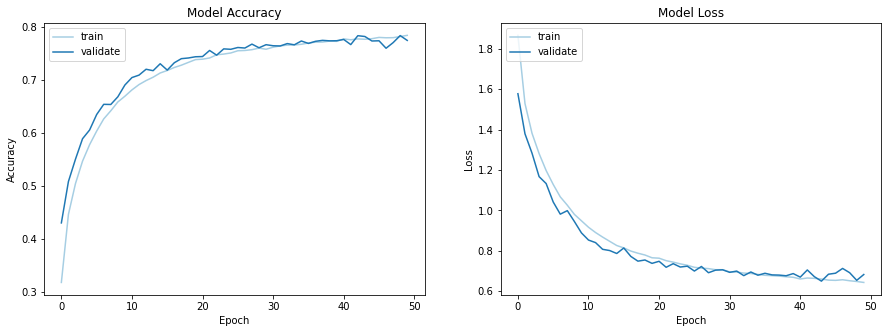

In [13]:
def plotmodelhistory(history): 
    fig, axs = plt.subplots(1,2,figsize=(15,5)) 
    # summarize history for accuracy
    axs[0].plot(history.history['accuracy']) 
    axs[0].plot(history.history['val_accuracy']) 
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy') 
    axs[0].set_xlabel('Epoch')
    axs[0].legend(['train', 'validate'], loc='upper left')
    # summarize history for loss
    axs[1].plot(history.history['loss']) 
    axs[1].plot(history.history['val_loss']) 
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss') 
    axs[1].set_xlabel('Epoch')
    axs[1].legend(['train', 'validate'], loc='upper left')
    plt.show()

# list all data in history
print(history.history.keys())

plotmodelhistory(history)

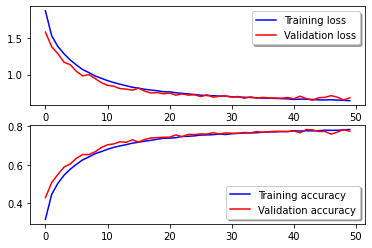

In [14]:
# Vizualize history
fig, ax = plt.subplots(2,1)

ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="Validation loss")
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r', label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

**Score of trained model and prediction.**

In [15]:
# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

# make prediction.
pred = model.predict(x_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.6827 - accuracy: 0.7748
Test loss: 0.6827024817466736
Test accuracy: 0.7748000025749207


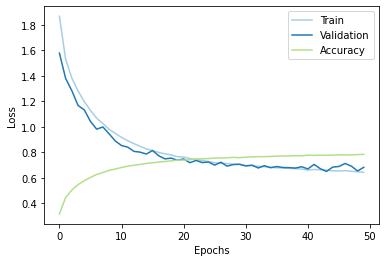

In [16]:

#plot of loss and epochs
def plotloss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.plot(history.history['accuracy'])
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation', 'Accuracy'])
    plt.show()    
plotloss(history)



**Confusion matrix**

* The confusion matrix may be quite useful in identifying the flaws in your model. The validation findings' confusion matrix is displayed. To get a nice visualization of our confusion matrix, we need to define to function.

In [17]:
def heatmap(data, row_labels, col_labels, ax=None, cbar_kw={}, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.
    """
    if not ax:
        ax = plt.gca()

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)
    # We want to show all ticks...
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    # ... and label them with the respective list entries.
    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels)
    
    ax.set_xlabel('Predicted Label') 
    ax.set_ylabel('True Label')
    ax.set_title ("confusion matrix")

    
    return im, cbar

def annotate_heatmap(im, data=None, fmt="d", threshold=None):
    """
    A function to annotate a heatmap.
    """
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            text = im.axes.text(j, i, format(data[i, j], fmt), horizontalalignment="center",
                                 color="white" if data[i, j] > thresh else "black")
            texts.append(text)

    return texts

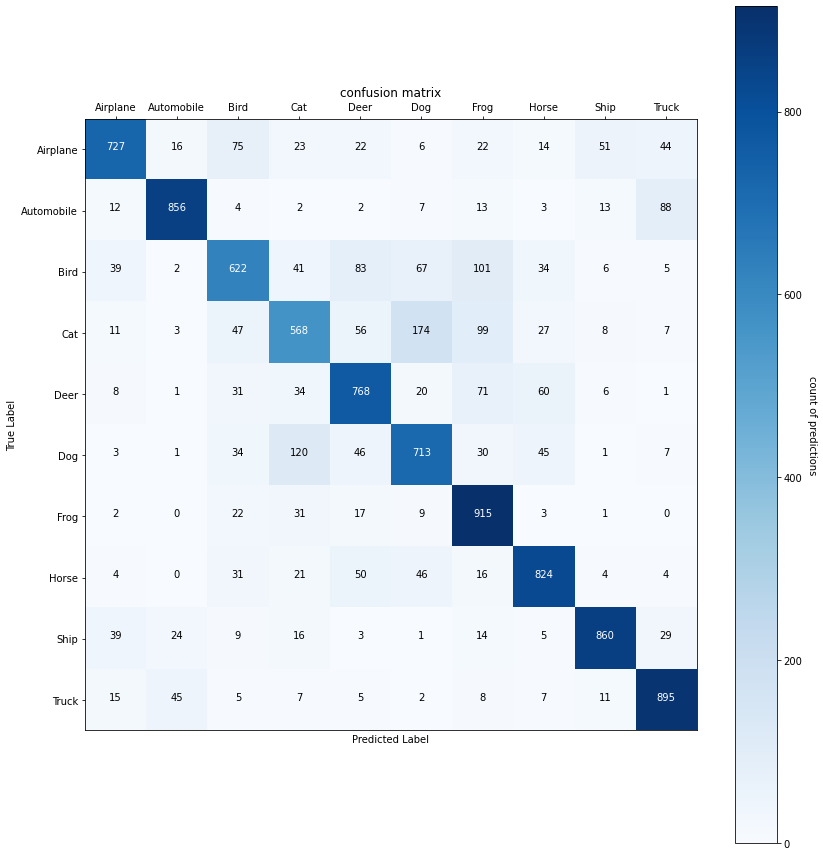

In [18]:
labels = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(pred, axis=1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test, axis=1)
# Errors are difference between predicted labels and true labels
errors = (Y_pred_classes - Y_true != 0)

Y_pred_classes_errors = Y_pred_classes[errors]
Y_pred_errors = pred[errors]
Y_true_errors = Y_true[errors]
X_test_errors = x_test[errors]

cm = confusion_matrix(Y_true, Y_pred_classes) 
thresh = cm.max() / 2.

fig, ax = plt.subplots(figsize=(12,12))
im, cbar = heatmap(cm, labels, labels, ax=ax,
                   cmap=plt.cm.Blues, cbarlabel="count of predictions")
texts = annotate_heatmap(im, data=cm, threshold=thresh)

fig.tight_layout()
plt.show()

**Classification report**

This will enable us to assess the model using several metrics (precision, recall, and F1 score).

In [19]:

print(classification_report(Y_true, Y_pred_classes))



              precision    recall  f1-score   support

           0       0.85      0.73      0.78      1000
           1       0.90      0.86      0.88      1000
           2       0.71      0.62      0.66      1000
           3       0.66      0.57      0.61      1000
           4       0.73      0.77      0.75      1000
           5       0.68      0.71      0.70      1000
           6       0.71      0.92      0.80      1000
           7       0.81      0.82      0.82      1000
           8       0.89      0.86      0.88      1000
           9       0.83      0.90      0.86      1000

    accuracy                           0.77     10000
   macro avg       0.78      0.77      0.77     10000
weighted avg       0.78      0.77      0.77     10000



**Checking the predictions**

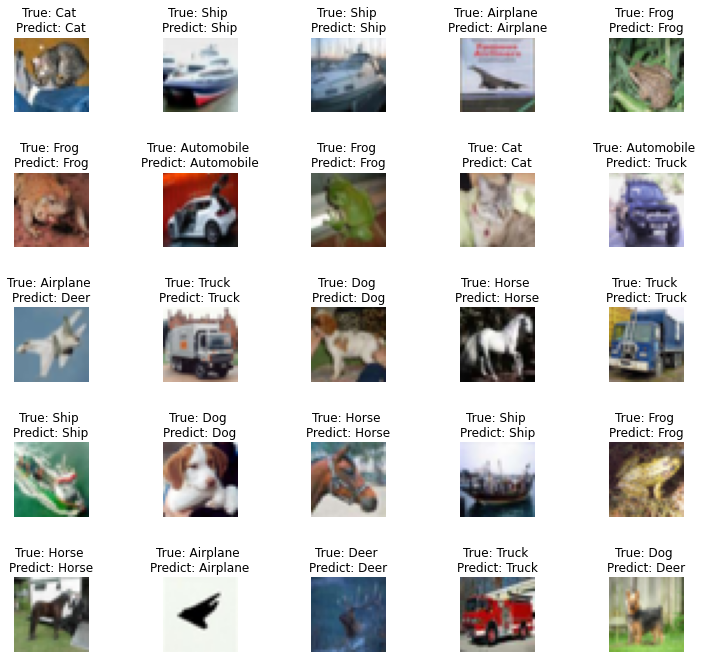

In [20]:


R = 5
C = 5
fig, axes = plt.subplots(R, C, figsize=(12,12))
axes = axes.ravel()

for i in np.arange(0, R*C):
    axes[i].imshow(x_test[i])
    axes[i].set_title("True: %s \nPredict: %s" % (labels[Y_true[i]], labels[Y_pred_classes[i]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)



**Checking the wrong predictions**

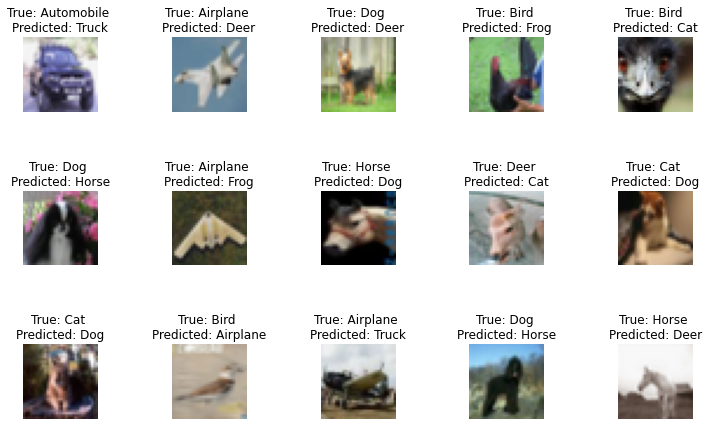

In [21]:
R = 3
C = 5
fig, axes = plt.subplots(R, C, figsize=(12,8))
axes = axes.ravel()

misclassified_idx = np.where(Y_pred_classes != Y_true)[0]
for i in np.arange(0, R*C):
    axes[i].imshow(x_test[misclassified_idx[i]])
    axes[i].set_title("True: %s \nPredicted: %s" % (labels[Y_true[misclassified_idx[i]]], 
                                                  labels[Y_pred_classes[misclassified_idx[i]]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)

**Checking the most important errors**

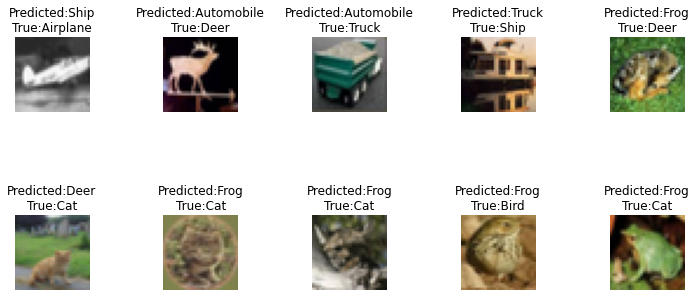

In [22]:
#showing 10 images with their predicted and real labels
def display_errors(errors_index, img_errors, pred_errors, obs_errors):
    n = 0
    nrows = 2
    ncols = 5
    fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True, figsize=(12,6))
    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]
            ax[row,col].imshow((img_errors[error]).reshape((32,32,3)))
            ax[row,col].set_title("Predicted:{}\nTrue:{}".
                                  format(labels[pred_errors[error]],labels[obs_errors[error]]))
            n += 1
            ax[row,col].axis('off')
            plt.subplots_adjust(wspace=1)

# Probabilities of the wrong predicted numbers
Y_pred_errors_prob = np.max(Y_pred_errors,axis = 1)

# Predicted probabilities of the true values in the error set
true_prob_errors = np.diagonal(np.take(Y_pred_errors, Y_true_errors, axis=1))

# Difference between the probability of the predicted label and the true label
delta_pred_true_errors = Y_pred_errors_prob - true_prob_errors

# Sorted list of the delta prob errors
sorted_dela_errors = np.argsort(delta_pred_true_errors)

# Top 10 errors 
most_important_errors = sorted_dela_errors[-10:]

# Show the top 10 errors
display_errors(most_important_errors, X_test_errors, Y_pred_classes_errors, Y_true_errors)

**Saving the model and weights**

We need to firstly indicate the directory to save the model and the name of our model

In [23]:
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'

# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Saved trained model at /content/saved_models/keras_cifar10_trained_model.h5 
313/313 [==============================] - 2s 6ms/step - loss: 0.6827 - accuracy: 0.7748
Test loss: 0.6827024817466736
Test accuracy: 0.7748000025749207
